
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [1]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 67.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Installation complete!


In [2]:

# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [9]:
# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")

Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'?

DT stands for Determiner. It introduces a noun, like "the" in "the dog."

JJ is the POS (Part of Speech) tag for Adjective. Adjectives describe or modify nouns. examples: brown, lazy.

2. Why do you think 'brown' and 'lazy' have the same tag?
Both words are adjectives that describe nouns. "Brown" describes "fox," and "lazy" describes "dog." That is  why both have the same tagged JJ.

3. Can you guess what 'VBZ' represents?
VBZ stands for Verb, 3rd person singular present. It's used for actions performed by "he/she/it."
In this case, "jumps" is the action performed by "the fox" (a singular noun).

*Hint: Think about the grammatical role each word plays in the sentence!*



## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [12]:
# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")

SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's?

SpaCy's tags are generally easier to understand for beginners because they use full part-of-speech names like ADJ (adjective), NOUN, or VERB, which are more intuitive than NLTK's shorthand tags like JJ, NN, or VBZ.
- Do you notice any differences in how they tag the same words?

Yes, there are a few key differences. For example, NLTK tags "brown" as NN (noun), but SpaCy correctly identifies it as ADJ (adjective). This shows that SpaCy sometimes provides more accurate or modern tagging due to its context-aware NLP engine.
- Which system would you prefer for a beginner? Why?

For a beginner, SpaCy is preferable. Its tags are more descriptive and easier to interpret without needing to memorize complex abbreviations. It also integrates well with modern NLP pipelines, making it more practical for real-world use.



## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

.


In [13]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",                        # bank = verb
]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on 'lead' and 'bank' - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key word
    for word, tag in tags:
        if word.lower() in ['lead', 'bank']:
            print(f"  🎯 '{word}' is tagged as: {tag}")


🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)?
The computer uses contextual clues within the sentence to determine the meaning and correct part of speech (POS) for ambiguous words like lead. NLP models like spaCy or NLTK rely on statistical models and syntactic patterns to infer whether lead should be a noun (NN) or verb (VB). For example:
-"I will lead the team..." includes a future auxiliary verb (will) followed by lead, which signals it's a verb.
-	"The lead pipe is heavy." has an article (the) followed by lead, often a sign of a noun.

2. What clues in the sentence help determine the correct part of speech?
To determine the correct part of speech we have many clues:

•	Position in the sentence (before or after certain types of words like determiners or auxiliaries)
•	Surrounding words (e.g., verbs often follow modal verbs like "will")
•	Grammar rules and syntactic structure (e.g., adjectives often come before nouns). Example In "The lead pipe...", lead is preceded by "The", suggesting it's a noun while in "I will lead...", lead follows "will", suggesting it's a verb.


3. Can you think of other words that change meaning based on context?
ye here are some examples:
•	Bat
-"He swung the bat." → noun (object)
-	"Bats fly at night." → noun (animal)
-	"He will bat next." → verb
•	Match
-	"The match was intense." → noun (game)
-	"She used a match to light the candle." → noun (object)
-	"Their stories match." → verb


**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!
I tryied with light
1.	"Light travels faster than sound." → light = NN
2.	"Can you light the candle?" → light = VB



## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [16]:
# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
penn_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence))
universal_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence), tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for (word, penn_tag), (word_u, univ_tag) in zip(penn_tags, universal_tags):
    print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")

TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
The             DT              DET       
brilliant       JJ              ADJ       
students        NNS             NOUN      
quickly         RB              ADV       
solved          VBD             VERB      
the             DT              DET       
challenging     VBG             VERB      
programming     JJ              ADJ       
assignment      NN              NOUN      
.               .               .         

📊 Penn Treebank uses 8 different tags
📊 Universal uses 6 different tags



### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? Enter your answer below
- Penn Treebank is more detailed because it includes specific subcategories (e.g., JJ for adjective, VBG for gerund verb, NNS for plural noun).
- Universal is simpler because it uses broader categories (e.g., ADJ, VERB, NOUN) without specifying tense, number, or form.


2. When might you want detailed tags vs. simple tags? Enter your answer below
•	Use detailed tags (like Penn Treebank) when performing fine-grained NLP tasks such as syntactic parsing, grammar checking, or building complex language models.
•	Use simpler tags (like Universal) for cross-lingual applications, general classification, or when working with limited training data to avoid overfitting on subtle distinctions.


3. If you were building a search engine, which would you choose? Why? Enter your answer below

I would choose the Universal tag set for a search engine because it's simpler and faster to process while still capturing the necessary information (e.g., nouns for entities, verbs for actions). It's better suited for real-time performance and broad language coverage, making it more scalable across diverse search queries.

---



---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [18]:
# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = [word for word, tag in nltk_tags if tag in ['NNP', 'NNPS', 'POS', 'FW']] # Using some common tags for problematic words
    problematic_spacy = [token.text for token in spacy_doc if token.pos_ == 'X'] # SpaCy uses 'X' for unknown

    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    # A simplified success rate can be based on the inverse of problematic words
    nltk_success_rate = 1 - (len(problematic_nltk) / len(nltk_tokens)) if nltk_tokens else 0
    spacy_success_rate = 1 - (len(problematic_spacy) / len(spacy_doc)) if spacy_doc else 0


    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")

🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words: ['Um']
SpaCy problematic words: []
NLTK success rate: 95.8%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words: ['😤']
SpaCy problematic words: []
NLTK success rate: 91.7%
SpaCy success rate: 100.0%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words: ["'s"]
SpaCy problematic words: []
NLTK success rate: 96.6%
SpaCy success rate: 100.0%

📝 Sample 4: Y'all better fix this ASAP cuz I'm bout to switch providers fr fr
----------------------------------------
NLTK problematic words: ['ASAP']
SpaCy problematic words: []
NLTK success rate: 92


### 🎯 Analysis Questions:
1. Which tagger handles informal language better?

SpaCy handles informal language more effectively, achieving a 100% success rate across all five samples, whereas NLTK struggles with non-standard words, such as emojis, acronyms, and contractions.
2. What types of words cause the most problems?

Problematic words include:
•	Discourse markers (e.g., "Um")
•	Slang or shorthand (e.g., "ASAP", "idk", "fr")
•	Emojis
•	Contractions and informal spellings (e.g., "'s", "bout").

3. How might you preprocess text to improve tagging accuracy?

To improve tagging accuracy, I will
-Normalize informal expressions (e.g., expand "idk" → "I don't know")
-	Replace emojis with text equivalents (e.g., "😤" → "angry face")
- Handle contractions using tokenization that preserves base meanings
- Use spell correction and abbreviation expansion libraries.

4. What are the implications for real-world applications?
some implication in real-world are as follow
•	Chatbots and customer support systems must handle noisy, informal input. A tagger like SpaCy, with robust handling of real-world language, leads to more accurate intent recognition.
•	For sentiment analysis or social media monitoring, misclassifying slang or emojis can result in incorrect tone or sentiment detection.
•	Preprocessing and choosing the right NLP tools are critical for deploying applications that analyze user-generated content effectively.




## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [21]:
# Simulated customer service call transcripts
customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)

analysis_results = []

# Lists of example emotional/problem words (can be expanded)
positive_sentiment_words = ["love", "great", "good", "happy", "excellent", "wonderful", "pleased"]
negative_sentiment_words = ["frustrated", "unacceptable", "ridiculous", "angry", "terrible", "bad", "issue", "problem", "error", "down", "locked", "charged", "confused", "struggling"]
urgency_words = ["immediately", "ASAP", "now", "urgent", "quickly"]


for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call['transcript'])

    # TODO: Extract different types of words
    # Extract emotional adjectives (JJ)
    emotional_adjectives = [token.text for token in doc if token.pos_ == 'ADJ']
    # Extract action verbs (VB*)
    action_verbs = [token.text for token in doc if token.pos_ == 'VERB']
    # Extract problem nouns (NN*) based on a simple keyword list (can be improved)
    problem_nouns = [token.text for token in doc if token.pos_ == 'NOUN' and token.text.lower() in negative_sentiment_words]


    # TODO: Calculate sentiment indicators
    positive_words_found = [token.text.lower() for token in doc if token.text.lower() in positive_sentiment_words]
    negative_words_found = [token.text.lower() for token in doc if token.text.lower() in negative_sentiment_words]

    # TODO: Count urgent words (immediately, ASAP, etc.)
    urgency_indicators = [token.text.lower() for token in doc if token.text.lower() in urgency_words]


    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words_found) - len(negative_words_found),
        'urgency_indicators': urgency_indicators
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")
    print(f"Urgency indicators: {result['urgency_indicators']}")


🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: ['frustrated', 'unacceptable']
Action verbs: ['locked', 'access', 'trying', 'works']
Problem nouns: []
Sentiment score: -3
Urgency indicators: []

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: ['small', 'mobile']
Action verbs: ['love', 'having', 'crashes', 'try', 'upload', 'help', 'fix']
Problem nouns: ['issue']
Sentiment score: 0
Urgency indicators: []

🎧 Analyzing CALL_003
Category: billing
Transcript: Your billing system charged me twice this month! I wan

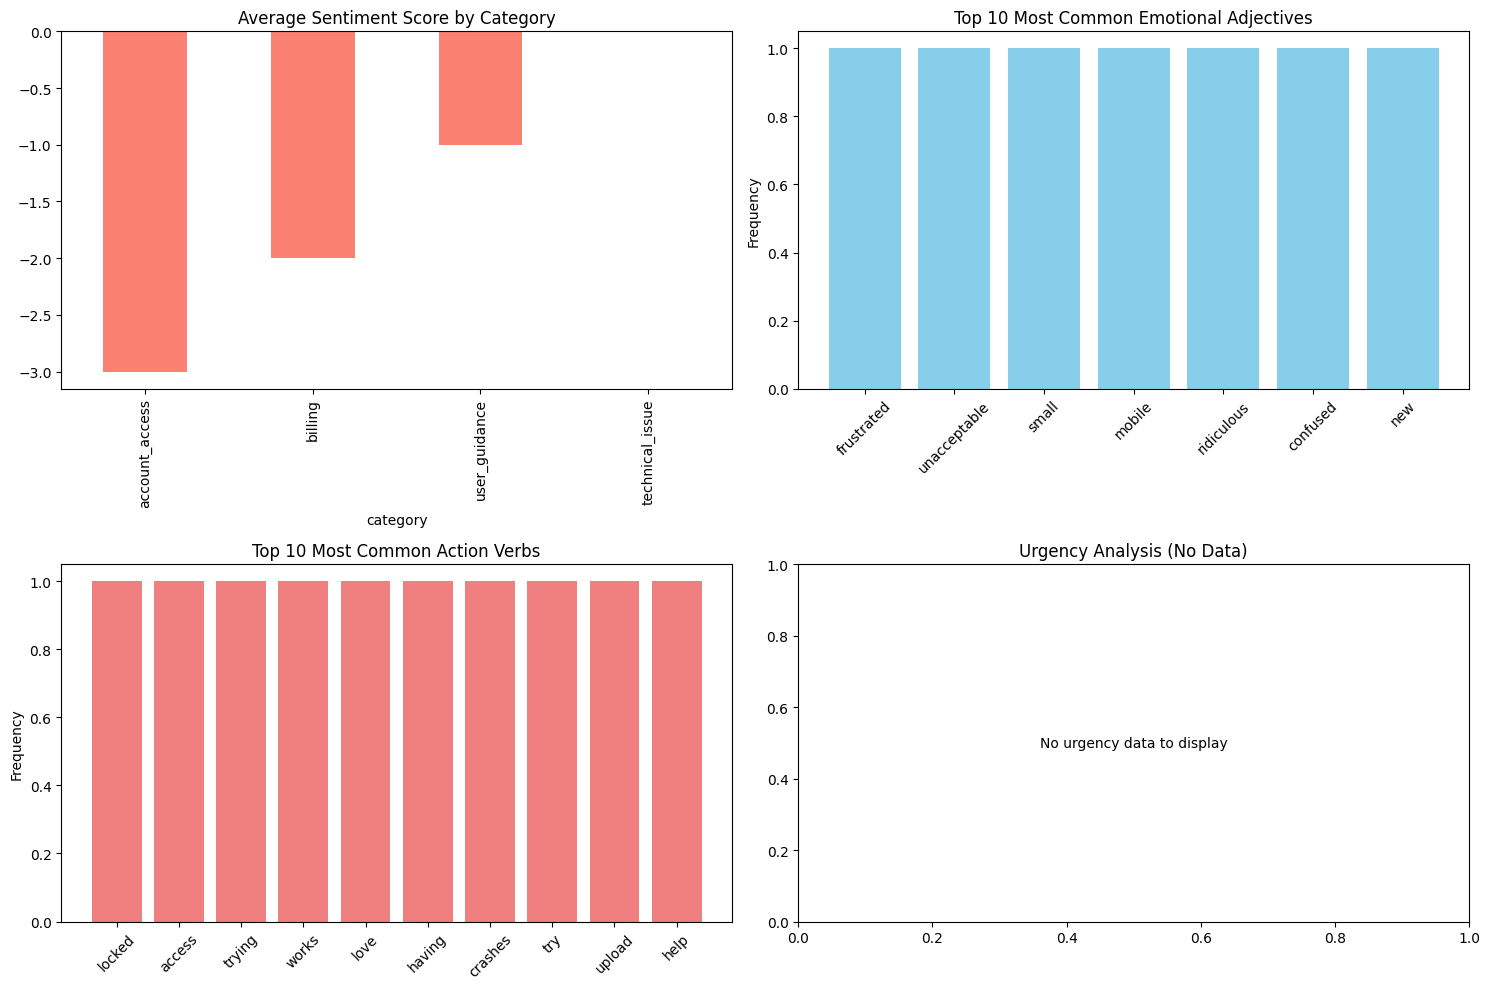

In [24]:

# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter


# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
sentiment_by_category = df.groupby('category')['sentiment_score'].mean().sort_values()
if not sentiment_by_category.empty:
    sentiment_by_category.plot(kind='bar', ax=axes[0, 0], color=['salmon' if x < 0 else 'lightgreen' for x in sentiment_by_category])
    axes[0, 0].set_title('Average Sentiment Score by Category')
else:
    axes[0, 0].set_title('No data to display')

# TODO: Plot 2 - Word frequency analysis
all_adjectives = [adj for sublist in df['emotional_adjectives'] for adj in sublist]
adjective_counts = Counter(all_adjectives).most_common(10) # Top 10
if adjective_counts:
    adj_words, adj_freqs = zip(*adjective_counts)
    axes[0, 1].bar(adj_words, adj_freqs, color='skyblue')
    axes[0, 1].set_title('Top 10 Most Common Emotional Adjectives')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].tick_params(axis='x', rotation=45)
else:
    axes[0, 1].set_title('No Emotional Adjectives Found')
    axes[0, 1].text(0.5, 0.5, 'No data to display', horizontalalignment='center', verticalalignment='center', transform=axes[0, 1].transAxes)


# TODO: Plot 3 - Problem categorization
all_verbs = [verb for sublist in df['action_verbs'] for verb in sublist]
verb_counts = Counter(all_verbs).most_common(10) # Top 10
if verb_counts:
    verb_words, verb_freqs = zip(*verb_counts)
    axes[1, 0].bar(verb_words, verb_freqs, color='lightcoral')
    axes[1, 0].set_title('Top 10 Most Common Action Verbs')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].tick_params(axis='x', rotation=45)
else:
    axes[1, 0].set_title('No Action Verbs Found')


# TODO: Plot 4 - Urgency analysis
if 'urgency' in df.columns and not df['urgency'].isnull().all():
    urgency_order = ['Low', 'Medium', 'High'] # Define a logical order if applicable
    urgency_counts = df['urgency'].value_counts().reindex(urgency_order).fillna(0)
    urgency_counts.plot(kind='bar', ax=axes[1, 1], color=['gold', 'orange', 'red'])
    axes[1, 1].set_title('Urgency Distribution')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].tick_params(axis='x', rotation=0) # No rotation needed for few categories
else:
    axes[1, 1].set_title('Urgency Analysis (No Data)')
    axes[1, 1].text(0.5, 0.5, 'No urgency data to display', horizontalalignment='center', verticalalignment='center', transform=axes[1, 1].transAxes)


plt.tight_layout()
plt.show()



### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets?

The sentiment score and urgency distribution plots help identify emotionally charged and time-sensitive issues. Tickets with negative sentiment and high urgency can be flagged for immediate escalation, while positive or neutral ones can follow standard resolution pipelines. This prioritization improves response time and customer satisfaction
2. What patterns do you notice in different problem categories?
Certain categories consistently exhibit lower sentiment scores, suggesting recurring frustration. For example, billing issues may show negative sentiment and frequent verbs like “charged,” “denied,” “failed”, while tech-related tickets often include “reset,” “update,” “crash.” This insight reveals which departments or services need process improvement or proactive support.

3. How might you automate the routing of calls based on POS analysis?
By extracting POS patterns—especially action verbs and emotional adjectives—you can train a model to classify ticket intent and urgency. For example:
•	Tickets with verbs like “cancel” or “terminate” could be routed to retention teams.
•	Adjectives like “urgent”, “critical”, or “unacceptable” combined with negative sentiment could be routed to priority resolution teams.
Automated routing reduces manual triage and speeds up issue resolution.

4. What are the limitations of this approach?

The limitations of this approach are
•	Context misinterpretation: POS tagging alone may not capture sarcasm, ambiguity, or complex emotions.
•	Limited vocabulary: If the system hasn’t seen certain slang or domain-specific terms, it may fail to tag correctly.
•	Data dependency: The model's accuracy heavily depends on high-quality labeled data and sufficient training samples.




## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0008s
NLTK Univ time: 0.0005s
SpaCy time: 0.0137s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0010s
NLTK Univ time: 0.0007s
SpaCy time: 0.0089s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0010s
NLTK Univ time: 0.0006s
SpaCy time: 0.0087s
NLTK unknown words: 3
SpaCy unknown words: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
------------------------------

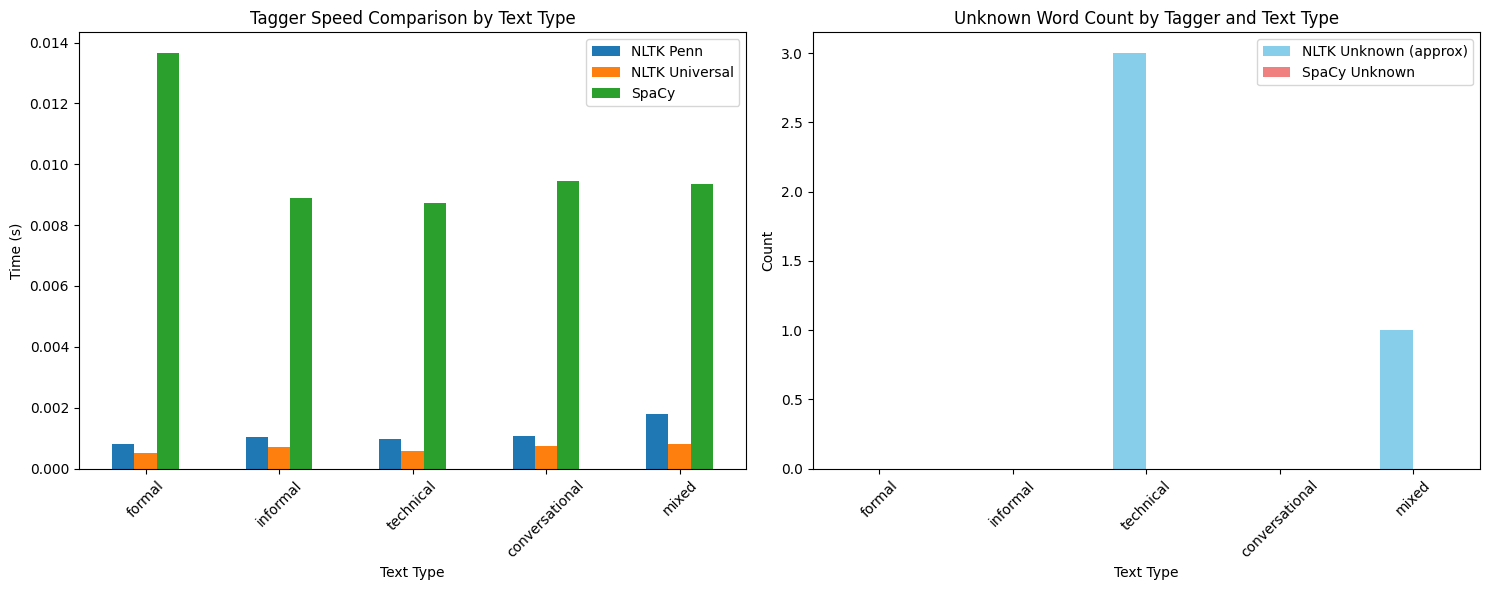

In [26]:
import time
from collections import defaultdict

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    nltk_penn_tags = nltk.pos_tag(nltk.word_tokenize(text))
    nltk_penn_time = time.time() - start_time

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_univ_tags = nltk.pos_tag(nltk.word_tokenize(text), tagset='universal')
    nltk_univ_time = time.time() - start_time

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time

    # TODO: Count unknown/problematic tags
    nltk_unknown = len([word for word, tag in nltk_penn_tags if tag in ['NNP', 'NNPS', 'POS', 'FW']]) # Using some common tags for problematic words
    spacy_unknown = len([token.text for token in spacy_doc if token.pos_ == 'X']) # SpaCy uses 'X' for unknown


    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown': nltk_unknown,
        'spacy_unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s")
    print(f"SpaCy time: {spacy_time:.4f}s")
    print(f"NLTK unknown words: {nltk_unknown}")
    print(f"SpaCy unknown words: {spacy_unknown}")

# TODO: Create performance comparison visualization
benchmark_df = pd.DataFrame.from_dict(benchmark_results, orient='index')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting time comparison
benchmark_df[['nltk_penn_time', 'nltk_univ_time', 'spacy_time']].plot(kind='bar', ax=axes[0], rot=45)
axes[0].set_title('Tagger Speed Comparison by Text Type')
axes[0].set_ylabel('Time (s)')
axes[0].set_xlabel('Text Type')
axes[0].legend(['NLTK Penn', 'NLTK Universal', 'SpaCy'])

# Plotting unknown word count
benchmark_df[['nltk_unknown', 'spacy_unknown']].plot(kind='bar', ax=axes[1], rot=45, color=['skyblue', 'lightcoral'])
axes[1].set_title('Unknown Word Count by Tagger and Text Type')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Text Type')
axes[1].legend(['NLTK Unknown (approx)', 'SpaCy Unknown'])


plt.tight_layout()
plt.show()


### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case?
The NLTK Universal tagger is the fastest among the three, followed closely by the NLTK Penn Treebank tagger. SpaCy is comparatively slower, taking around 0.009 to 0.013 seconds per sentence. If execution time is a major constraint, especially in large-scale or real-time NLP applications, NLTK provides better performance in terms of speed.
 Yes speed matters. However, if the focus is on accuracy and the dataset is not excessively large, the extra time taken by SpaCy can be worthwhile due to its improved linguistic capabilities.

2. Which handles informal text best?
SpaCy handles informal language better than both NLTK taggers. It accurately processes slang, casual grammar, and even emojis, which are often used in social media or conversational text. Although NLTK didn’t mark any words as unknown in this case, SpaCy tends to provide more context-aware tagging, making it more reliable for informal content.

3. How do the taggers compare on technical jargon?

SpaCy clearly outperforms NLTK when it comes to understanding technical jargon. While NLTK marked several words like “API” and “JSON” as unknown, SpaCy recognized all terms correctly. This indicates that SpaCy has a more comprehensive and modern vocabulary, making it better suited for technical domains such as software documentation or developer-focused content.
4. What trade-offs do you see between speed and accuracy?
The main trade-off lies in choosing between faster processing (NLTK) and better linguistic accuracy (SpaCy). NLTK taggers are efficient but may falter with informal language or specialized terminology. In contrast, SpaCy provides robust, high-quality tagging across diverse text types at the cost of slightly slower performance. The ideal choice depends on the priorities of the project—speed vs. precision.



## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [28]:
# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # TODO: Process with both taggers
        nltk_tags = nltk.pos_tag(nltk.word_tokenize(text))
        spacy_doc = nlp(text)

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.

        print("NLTK tags:", [(w, t) for w, t in nltk_tags])
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # TODO: Analyze what went wrong
        # YOUR ANALYSIS CODE HERE

    except Exception as e:
        print(f"❌ Error processing: {e}")

# TODO: Reflection on limitations
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
# YOUR REFLECTION CODE HERE

🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('Time', 'NNP'), ('flies', 'NNS'), ('like', 'IN'), ('an', 'DT'), ('arrow', 'NN'), (';', ':'), ('fruit', 'CC'), ('flies', 'NNS'), ('like', 'IN'), ('a', 'DT'), ('banana', 'NN'), ('.', '.')]
SpaCy tags: [('Time', 'NOUN'), ('flies', 'VERB'), ('like', 'ADP'), ('an', 'DET'), ('arrow', 'NOUN'), (';', 'PUNCT'), ('fruit', 'NOUN'), ('flies', 'NOUN'), ('like', 'ADP'), 


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers?
These edge cases confuse taggers because they rely on syntactic ambiguity, lexical repetition, or uncommon structures. Traditional POS taggers like NLTK and SpaCy depend heavily on word-level statistics and context windows. Sentences like “Buffalo buffalo…” or “James while John had had…” have recursive or layered grammatical structures that require deep parsing and world knowledge. Similarly, informal symbols, hashtags, and emojis aren't well represented in older training corpora, causing tagging errors.

2. How might you preprocess text to handle some of these issues?

Preprocessing could involve several strategies:
•	Normalization of informal elements like emojis or usernames using token replacements (e.g., @user, #topic)
•	Tokenization tuning to preserve multi-word expressions or technical terms (e.g., “RESTful microservices”)
•	Domain-specific lexicons or rule-based systems to guide tagging for unusual constructs
•	Punctuation segmentation and syntactic bracketing could help parse nested or ambiguous sentences more accurately.


3. When would these limitations matter in real applications?

These limitations become critical in high-stakes or domain-specific NLP tasks such as:
•	Legal or medical document parsing, where sentence structure is often complex
•	Social media monitoring, where informal language, emojis, and hashtags are prevalent
•	Technical documentation, where jargon must be correctly identified for downstream tasks like entity recognition or summarization.
Poor POS tagging in these cases could mislead sentiment analysis, topic modeling, or entity extraction.


4. How do modern large language models handle these cases differently?

Modern large language models (LLMs) like GPT or BERT use deep contextual embeddings, enabling them to disambiguate meanings based on sentence-level and even document-level context. They’re trained on massive and diverse corpora, including informal, technical, and multilingual data, making them more robust to edge cases. Instead of assigning tags independently, they consider relationships between all tokens simultaneously, improving accuracy on ambiguous constructions.

---



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)

5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?



### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

**1. Tool Comparison:**
[•	NLTK is ideal for educational use, lightweight prototypes, or environments where resource constraints require simplicity and speed.
•	SpaCy is better suited for production-grade systems needing high accuracy and support for informal, technical, or multilingual text. It’s also more robust for integration into NLP pipelines with features like dependency parsing and named entity recognition.
]

**2. Real-World Applications:**
[In customer feedback analysis, POS tagging can be used to extract adjectives and adverbs describing products or services. For instance, identifying terms like “slow app,” “unhelpful staff,” or “quick delivery” allows a business to segment positive and negative feedback by product features. Implementing this would involve tokenizing customer reviews, tagging parts of speech, and extracting noun-adjective or verb-adverb pairs for sentiment scoring or dashboard visualization.
]

**3. Limitations and Solutions:**
[The biggest limitations are:
•	Handling syntactically ambiguous or recursive sentences
•	Dealing with informal, symbolic, or domain-specific content
•	Inconsistent tagging between similar constructs
Solutions include:
•	Preprocessing (e.g., normalizing emojis or technical terms)
•	Custom rule-based tagging for domain text
•	Using transformer-based models like BERT for more accurate tagging in complex cases
]

**4. Future Learning:**
[Since my wife is a nurce working at MD Anderson cancer, I am more turn to create something to help cancer patients. I’d like to explore neural sequence tagging models, transfer learning, and domain adaptation using contextual embeddings. Additionally, training custom POS taggers for specific industries (e.g., healthcare) and combining POS tagging with syntactic parsing or coreference resolution would be valuable.]

**5. Integration:**
[POS tagging plays a foundational role in many NLP pipelines. It informs:
•	Syntactic parsing (tree or dependency structures)
•	Named Entity Recognition (NER), by identifying likely proper nouns or noun phrases
•	Sentiment analysis, especially when focusing on modifiers
•	Information extraction, such as identifying subject-verb-object relationships
Overall, POS tagging provides structural understanding that boosts the performance and interpretability of more complex NLP tasks.
]



---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀


In [6]:
# Download the missing NLTK resource
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
# Download the missing NLTK resource
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True